# Correlation between BSS trips and COVID-19

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../')

## Import and prepare covid data

In [46]:
data_folder = '../../data/'
covid_data = pd.read_csv(data_folder + 'covid/treated_data/covid_grouped_by_week.csv')
covid_data.head()

,date,new_cases_ma,new_deaths_ma
0,2020-03-08,2.333333,NaN
1,2020-03-15,11.285714,NaN
2,2020-03-22,87.000000,NaN
3,2020-03-29,335.000000,10.142857
4,2020-04-05,702.857143,33.857143


In [47]:
from modules.DataPreparation import DataPreparation
dp = DataPreparation()

In [48]:
covid_data = dp.transform_to_datetime(covid_data, ['date'])
covid_data = dp.transform_to_time_series(covid_data, 'date', drop=True)
covid_data.head()

,new_cases_ma,new_deaths_ma
date,,
2020-03-08,2.333333,NaN
2020-03-15,11.285714,NaN
2020-03-22,87.000000,NaN
2020-03-29,335.000000,10.142857
2020-04-05,702.857143,33.857143


## Prepare trips data

In [49]:
without_outliers = False

In [50]:
if without_outliers:
    source_folder_path =  data_folder + 'trips/preprocessed/grouped/'
else:
    source_folder_path = data_folder + 'trips/preprocessed/grouped/'

destination_folder_path = data_folder + 'charts/covid/'

In [51]:
trips = pd.read_csv(source_folder_path + 'trips_grouped_by_week_mean.csv')
trips.head()

,date,number_of_trips,tripduration,start_station_id,end_station_id,age,hour,week_day,weekend,holiday
0,2018-01-28,21,2200.350000,24.950000,23.100000,NaN,14.619048,5.523810,0.952381,0.000000
1,2018-02-04,1447,2330.046560,20.427386,18.226141,NaN,14.498272,3.778162,0.300622,0.000000
2,2018-02-11,2846,1679.169831,18.810260,16.636683,NaN,14.141251,2.630710,0.119466,0.000000
3,2018-02-18,2274,2209.371806,20.506596,18.861478,NaN,13.649077,3.274846,0.230871,0.189094
4,2018-02-25,4754,1741.081474,18.027146,17.179541,NaN,13.591923,2.834666,0.211191,0.000000


In [52]:
from modules.DataPreparation import DataPreparation
dp = DataPreparation()

In [53]:
trips = dp.transform_to_datetime(trips, ['date'])

In [54]:
trips = dp.transform_to_time_series(trips, 'date', drop = True)

In [55]:
trips

,number_of_trips,tripduration,start_station_id,end_station_id,age,hour,week_day,weekend,holiday
date,,,,,,,,,
2018-01-28,21,2200.350000,24.950000,23.100000,NaN,14.619048,5.523810,0.952381,0.000000
2018-02-04,1447,2330.046560,20.427386,18.226141,NaN,14.498272,3.778162,0.300622,0.000000
2018-02-11,2846,1679.169831,18.810260,16.636683,NaN,14.141251,2.630710,0.119466,0.000000
2018-02-18,2274,2209.371806,20.506596,18.861478,NaN,13.649077,3.274846,0.230871,0.189094
2018-02-25,4754,1741.081474,18.027146,17.179541,NaN,13.591923,2.834666,0.211191,0.000000
...,...,...,...,...,...,...,...,...,...
2022-04-03,38337,2957.490034,146.512794,147.836372,31.891032,13.485745,2.758901,0.249185,0.000000
2022-04-10,44999,2941.772700,146.263561,148.256406,31.841437,13.561168,3.032534,0.281784,0.000000
2022-04-17,38428,3050.023484,142.481550,143.819767,32.226956,13.578875,2.737639,0.233424,0.000000


## Merge COVID and trip data

In [56]:
trips_and_covid = pd.merge(trips, covid_data, how = 'outer',left_index=True, right_index=True)
trips_and_covid

,number_of_trips,tripduration,start_station_id,end_station_id,age,hour,week_day,weekend,holiday,new_cases_ma,new_deaths_ma
date,,,,,,,,,,,
2018-01-28,21.0,2200.350000,24.950000,23.100000,NaN,14.619048,5.523810,0.952381,0.000000,NaN,NaN
2018-02-04,1447.0,2330.046560,20.427386,18.226141,NaN,14.498272,3.778162,0.300622,0.000000,NaN,NaN
2018-02-11,2846.0,1679.169831,18.810260,16.636683,NaN,14.141251,2.630710,0.119466,0.000000,NaN,NaN
2018-02-18,2274.0,2209.371806,20.506596,18.861478,NaN,13.649077,3.274846,0.230871,0.189094,NaN,NaN
2018-02-25,4754.0,1741.081474,18.027146,17.179541,NaN,13.591923,2.834666,0.211191,0.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2022-07-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48868.571429,239.428571
2022-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36190.714286,229.285714
2022-08-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30317.428571,212.571429


In [57]:
trips_and_covid = trips_and_covid[:'2022-05-01']
trips_and_covid

,number_of_trips,tripduration,start_station_id,end_station_id,age,hour,week_day,weekend,holiday,new_cases_ma,new_deaths_ma
date,,,,,,,,,,,
2018-01-28,21.0,2200.350000,24.950000,23.100000,NaN,14.619048,5.523810,0.952381,0.000000,NaN,NaN
2018-02-04,1447.0,2330.046560,20.427386,18.226141,NaN,14.498272,3.778162,0.300622,0.000000,NaN,NaN
2018-02-11,2846.0,1679.169831,18.810260,16.636683,NaN,14.141251,2.630710,0.119466,0.000000,NaN,NaN
2018-02-18,2274.0,2209.371806,20.506596,18.861478,NaN,13.649077,3.274846,0.230871,0.189094,NaN,NaN
2018-02-25,4754.0,1741.081474,18.027146,17.179541,NaN,13.591923,2.834666,0.211191,0.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2022-04-03,38337.0,2957.490034,146.512794,147.836372,31.891032,13.485745,2.758901,0.249185,0.000000,25300.285714,204.571429
2022-04-10,44999.0,2941.772700,146.263561,148.256406,31.841437,13.561168,3.032534,0.281784,0.000000,21517.571429,170.714286
2022-04-17,38428.0,3050.023484,142.481550,143.819767,32.226956,13.578875,2.737639,0.233424,0.000000,18220.714286,119.857143


In [58]:
trips_and_covid['age'].first_valid_index()

Timestamp('2020-01-05 00:00:00')

In [59]:
trips_and_covid = trips_and_covid.rename({'distance_in_meters_bicycle':'distance'}, axis = 1)

## Correlation

In [60]:
def plot_all_correlations(data):
    # get the data correlation matrix
    corr = data.corr()
    plt.figure(figsize=(9, 7))
    plt.imshow(corr.abs(), cmap='Blues', interpolation='none', aspect='auto')
    plt.colorbar()
    plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
    plt.yticks(range(len(corr)), corr.columns)
    plt.suptitle('Absolute Correlation between variables', fontsize=15, fontweight='bold')
    plt.grid(False)
    plt.show()
    return corr

def plot_target_variable_correlation(data, corr, target_variable, without_outliers = False):
    correlation = np.array(corr[target_variable])
    # remove correlation with itself
    correlation = np.delete(correlation, np.where(correlation == 1))
    columns = np.array(data.keys())
    columns =  np.delete(columns, np.where(columns == target_variable))
    plt.figure(figsize=(15, 7))
    plt.bar(columns, correlation)
    for i in range(len(correlation)):
        if correlation[i] > 0:
            va="bottom"
        else:
            va="top"
        plt.text(i, correlation[i], round(correlation[i], 2), ha="center", va=va)
    title = "Correlation with '{variable}' variable".format(variable = target_variable)
    if without_outliers:
        title = title + ' (without outliers)'
    plt.title(title)
    if without_outliers:
        filename = target_variable + '_without_outliers.png'
    else:
        filename = target_variable + '.png'
    plt.savefig(destination_folder_path + 'correlation/' + filename)
    plt.show(True)

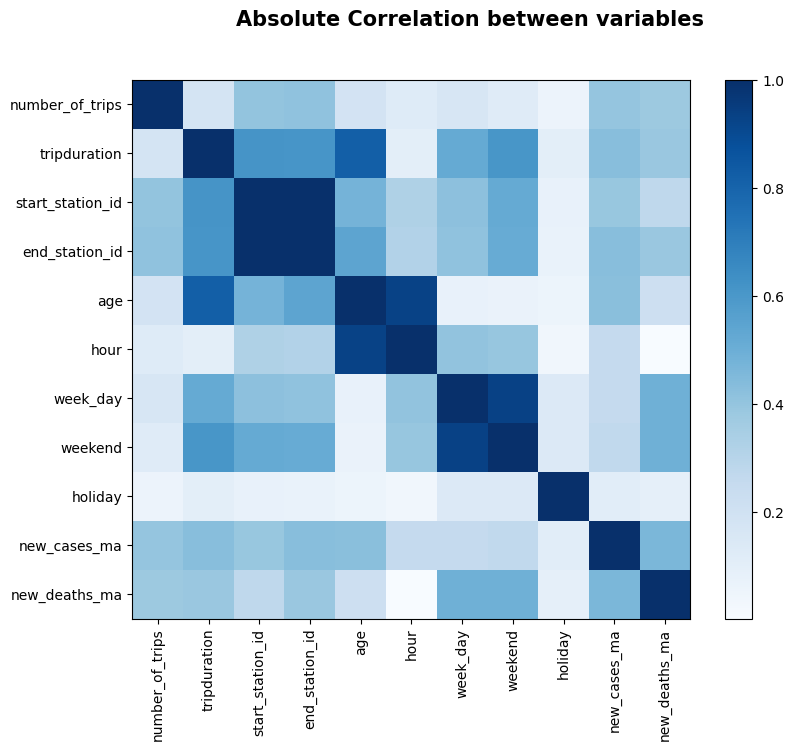

In [61]:
correlation_matrix = plot_all_correlations(trips_and_covid)

## COVID-19 cases

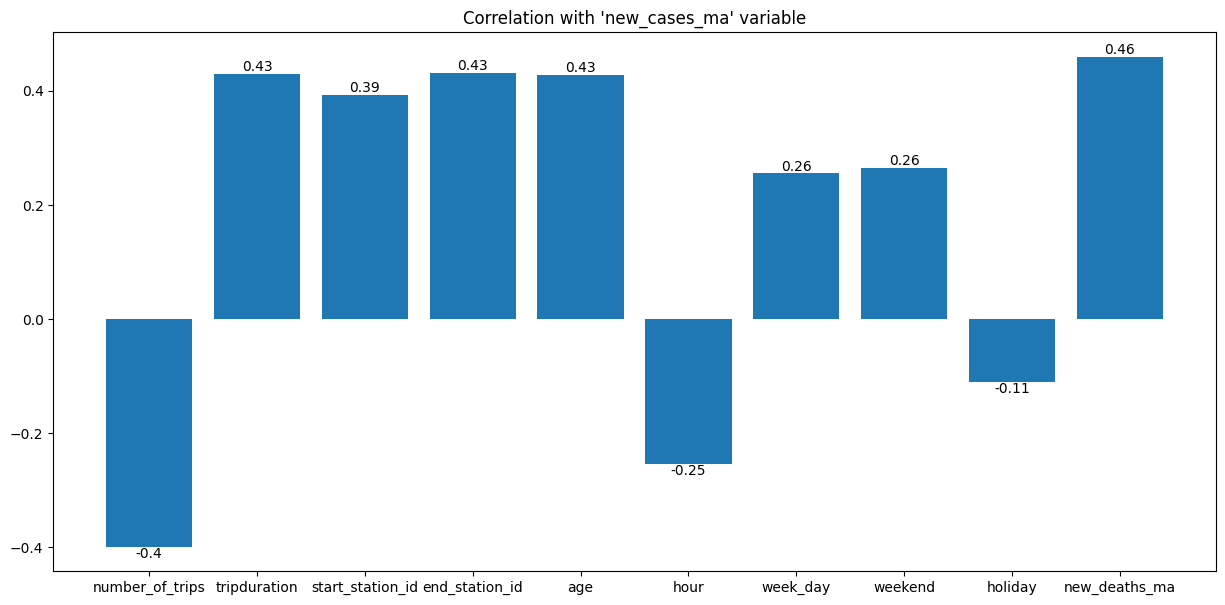

In [62]:
correlation_with_variable = plot_target_variable_correlation(trips_and_covid, correlation_matrix,
                                                            'new_cases_ma',
                                                             without_outliers = without_outliers)

## COVID-19 deaths

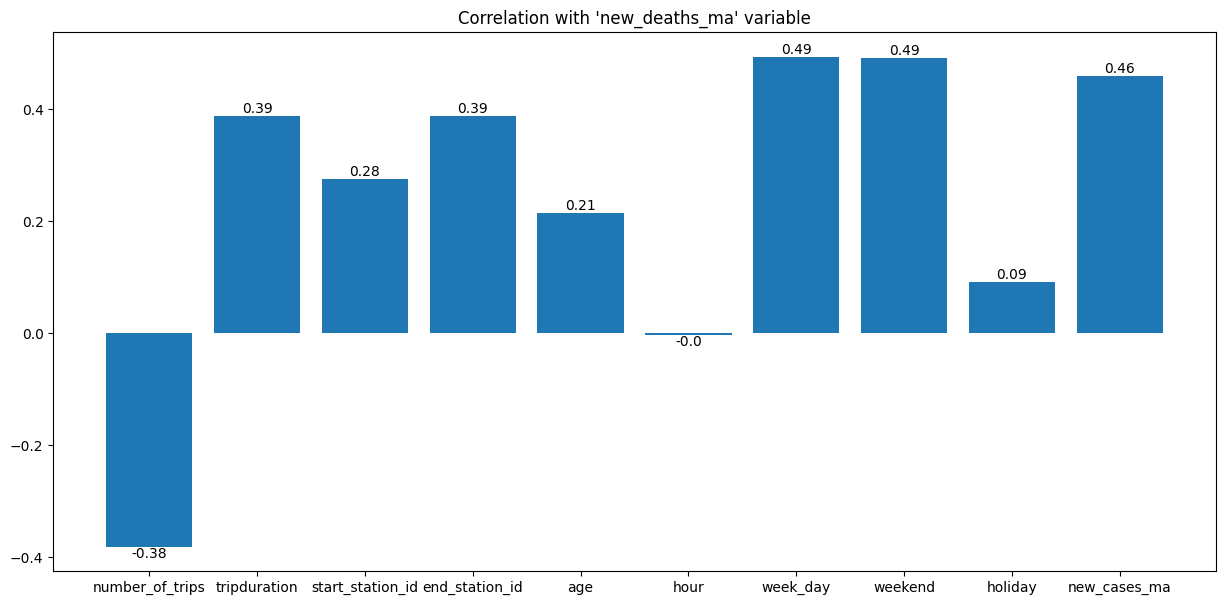

In [63]:
correlation_with_variable = plot_target_variable_correlation(trips_and_covid, correlation_matrix,
                                                            'new_deaths_ma',
                                                             without_outliers = without_outliers)

### Plot together

In [64]:
def plot_variable_and_covid_together(variable, covid_variable):
    trips_and_covid_plot = trips_and_covid.filter([variable, covid_variable])
    plt.gcf().set_size_inches(20, 1)
    ax = trips_and_covid_plot.plot(secondary_y = covid_variable, ylim=(0,None), label = 'Número médio de viagens diárias',
                                   figsize = (20,11))
    title = "'{variable}' vs '{covid_variable}'".format(variable = variable, covid_variable = covid_variable)
    plt.title(title)
    ax.axvline('2020-03-24', color="black", linestyle="--",  label='Início da quarentena')
    ax.axvline('2020-05-27', color="purple", linestyle="--",  label='Plano SP de retomada consciente')
    ax.axvline('2020-10-06', color="green", linestyle="--",  label='Fase Verde')
    ax.axvline('2020-11-30', color="yellow", linestyle="--",  label='Fase Amarela')
    ax.axvline('2021-03-15', color="red", linestyle="--",  label='Fase Emergencial')
    ax.axvline('2021-08-17', color="green", linestyle="--",  label='Fase Verde')
    ax.axvline('2021-11-01', color="m", linestyle="--",  label='Fim das restrições')
    plt.ylim(bottom=0)
    plt.axis([None, None, 0, None])
    ax.legend(bbox_to_anchor=(1.15, 1), loc='upper left')
    if without_outliers:
        filename = variable + '_vs_'+ covid_variable+'_without_ouliers.png'
    else:
        filename = variable + '_vs_'+ covid_variable+'.png'
    plt.savefig(destination_folder_path + 'versus_covid/'+filename)
    plt.show()

In [65]:
import numpy as np
np.concatenate((list(range(0,14401,1200)), [28800, 57600]))

array([    0,  1200,  2400,  3600,  4800,  6000,  7200,  8400,  9600,
       10800, 12000, 13200, 14400, 28800, 57600])

<Figure size 2000x100 with 0 Axes>

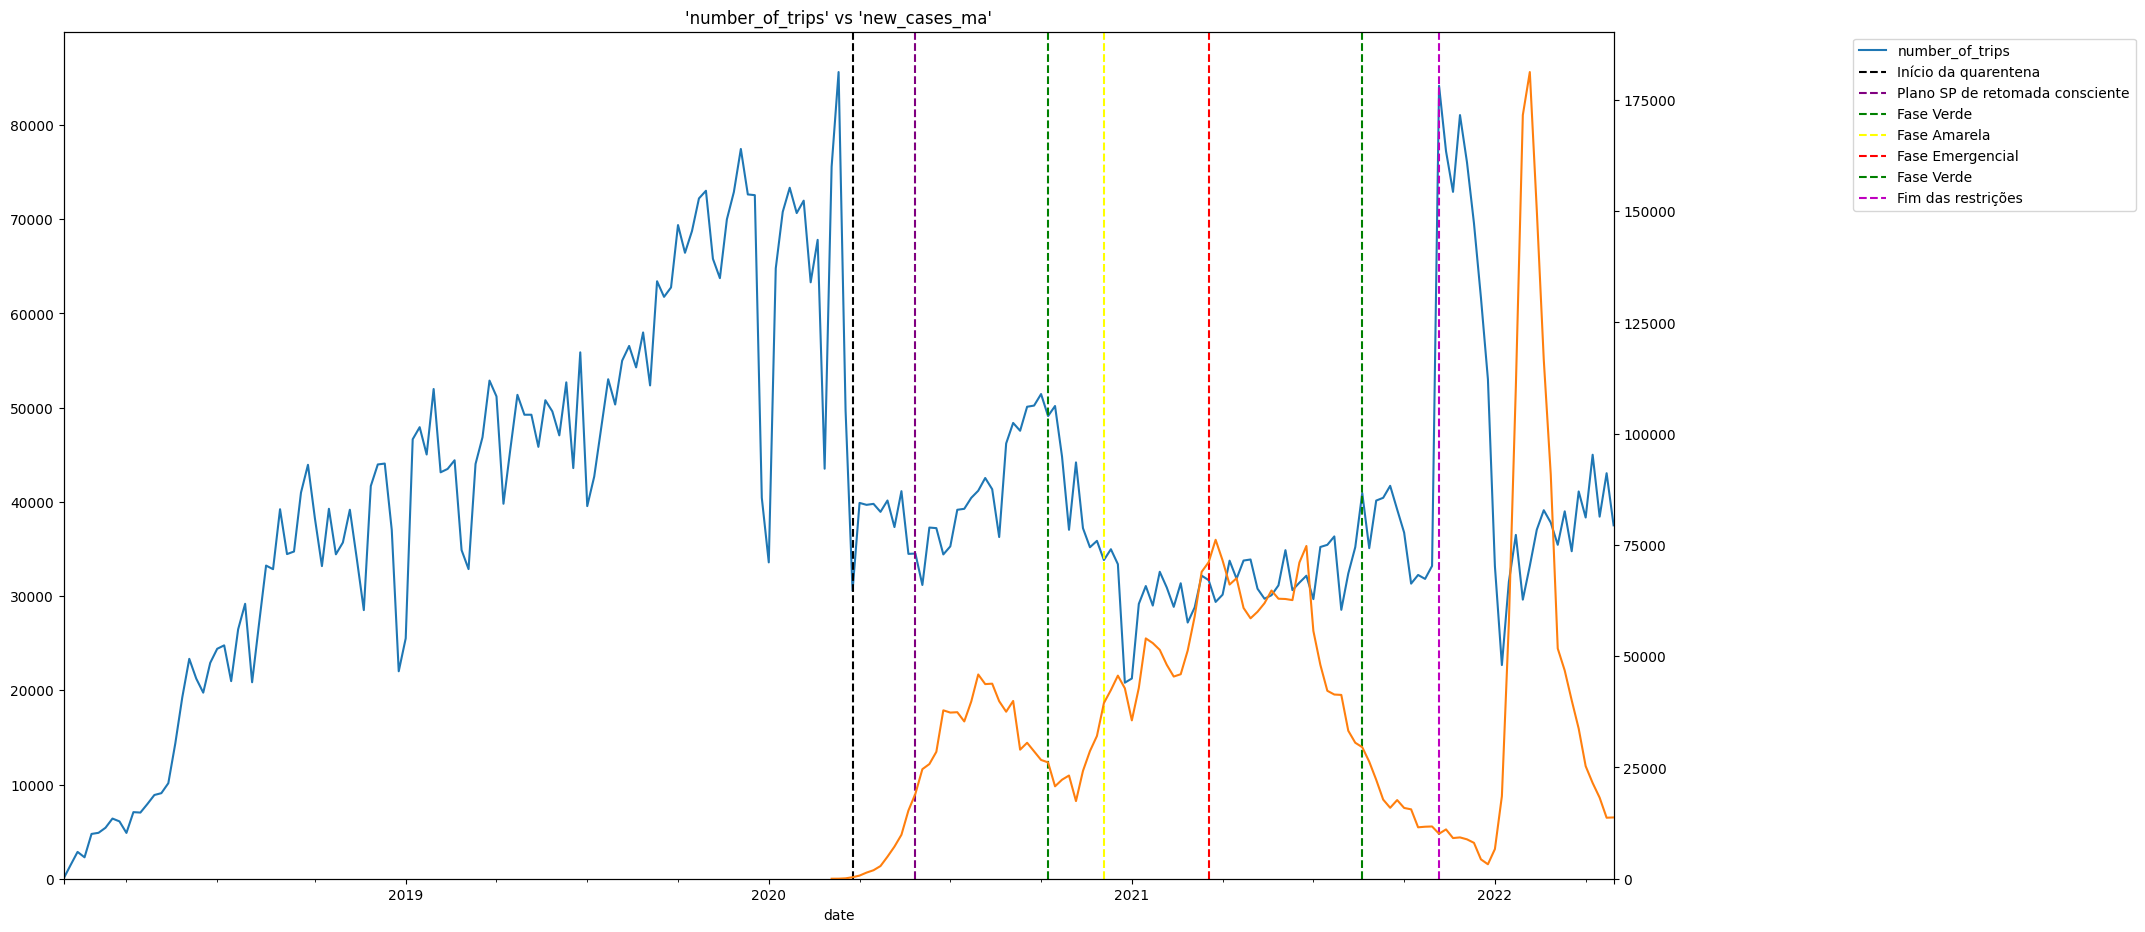

In [66]:
variable = 'number_of_trips'
covid_variable = 'new_cases_ma'
plot_variable_and_covid_together(variable, covid_variable)


In [67]:
def alt_bands(start, end, ax=None, color = 'black'):
    ax = ax or plt.gca()
    x_left, x_right = ax.get_xlim()
    ax.axvspan(start, end, facecolor=color, alpha=0.1)
    ax.set_xlim(x_left, x_right)

def plot_variable_and_covid_together(variable, covid_variable):
    trips_and_covid_plot = trips_and_covid[:].filter([variable, covid_variable])
    fig, ax = plt.subplots()
    fig.set_figwidth(20)
    fig.set_figheight(10)
    ax2 = ax.twinx()
    ax.plot(trips_and_covid_plot.index, trips_and_covid_plot[variable], 'g-', label = 'Number of trips')
    ax2.plot(trips_and_covid_plot.index, trips_and_covid_plot[covid_variable], 'b-', label = 'New cases of COVID-19')
    ax2.set_ylim(0)
    ax.set_ylim(0)
    ax.set_xlabel('Date', fontsize=20, labelpad = 20)
    ax.set_ylabel('Number of trips', color='k', fontsize=20, labelpad = 20)
    ax2.set_ylabel('New cases of covid', color='k', fontsize=20)
    if True:
        title = "Number of trips vs New cases of covid"
    else:    
        title = "'{variable}' vs '{covid_variable}'".format(variable = variable, covid_variable = covid_variable)
    plt.title(title, size=25, pad = 20)
    ax.axvline(pd.to_datetime('2020-03-24'), color="black", linestyle="--",  label='Lockdown in SP', linewidth = 3.0)
    # alt_bands('2020-03-24', '2020-05-27', ax, 'black')
    # ax.axvline(pd.to_datetime('2020-05-27'), color="purple", linestyle="--",  label='Retomada consciente', linewidth = 3.0)
    # alt_bands('2020-03-24', '2020-05-27', ax, 'black')
    # ax.axvline(pd.to_datetime('2020-10-06'), color="green", linestyle="--",  label='Fase Verde', linewidth = 3.0)
    # ax.axvline(pd.to_datetime('2020-11-30'), color="yellow", linestyle="--",  label='Fase Amarela', linewidth = 3.0)
    # ax.axvline(pd.to_datetime('2021-03-15'), color="red", linestyle="--",  label='Fase Emergencial', linewidth = 3.0)
    # ax.axvline(pd.to_datetime('2021-08-17'), color="green", linestyle="--",  label='Fase Verde', linewidth = 3.0)
    ax.axvline(pd.to_datetime('2021-11-01'), color="m", linestyle="--",  label='End of COVID-19 restrictions', linewidth = 3.0)
    plt.ylim(bottom=0)
    plt.axis([None, None, 0, None])
    # Set tick font size
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontsize(16)
    for label in (ax2.get_xticklabels() + ax2.get_yticklabels()):
        label.set_fontsize(16)
    ax.legend(bbox_to_anchor=(1.15, 1), loc='upper left', fontsize = 18)
    ax2.legend(bbox_to_anchor=(1.15, 1), loc='lower left', fontsize = 18)
    if without_outliers:
        filename = variable + '_vs_'+ covid_variable+'_without_ouliers.png'
    else:
        filename = variable + '_vs_'+ covid_variable+'.png'
    # plt.savefig(destination_folder_path + 'versus_covid/'+filename)
    plt.show()

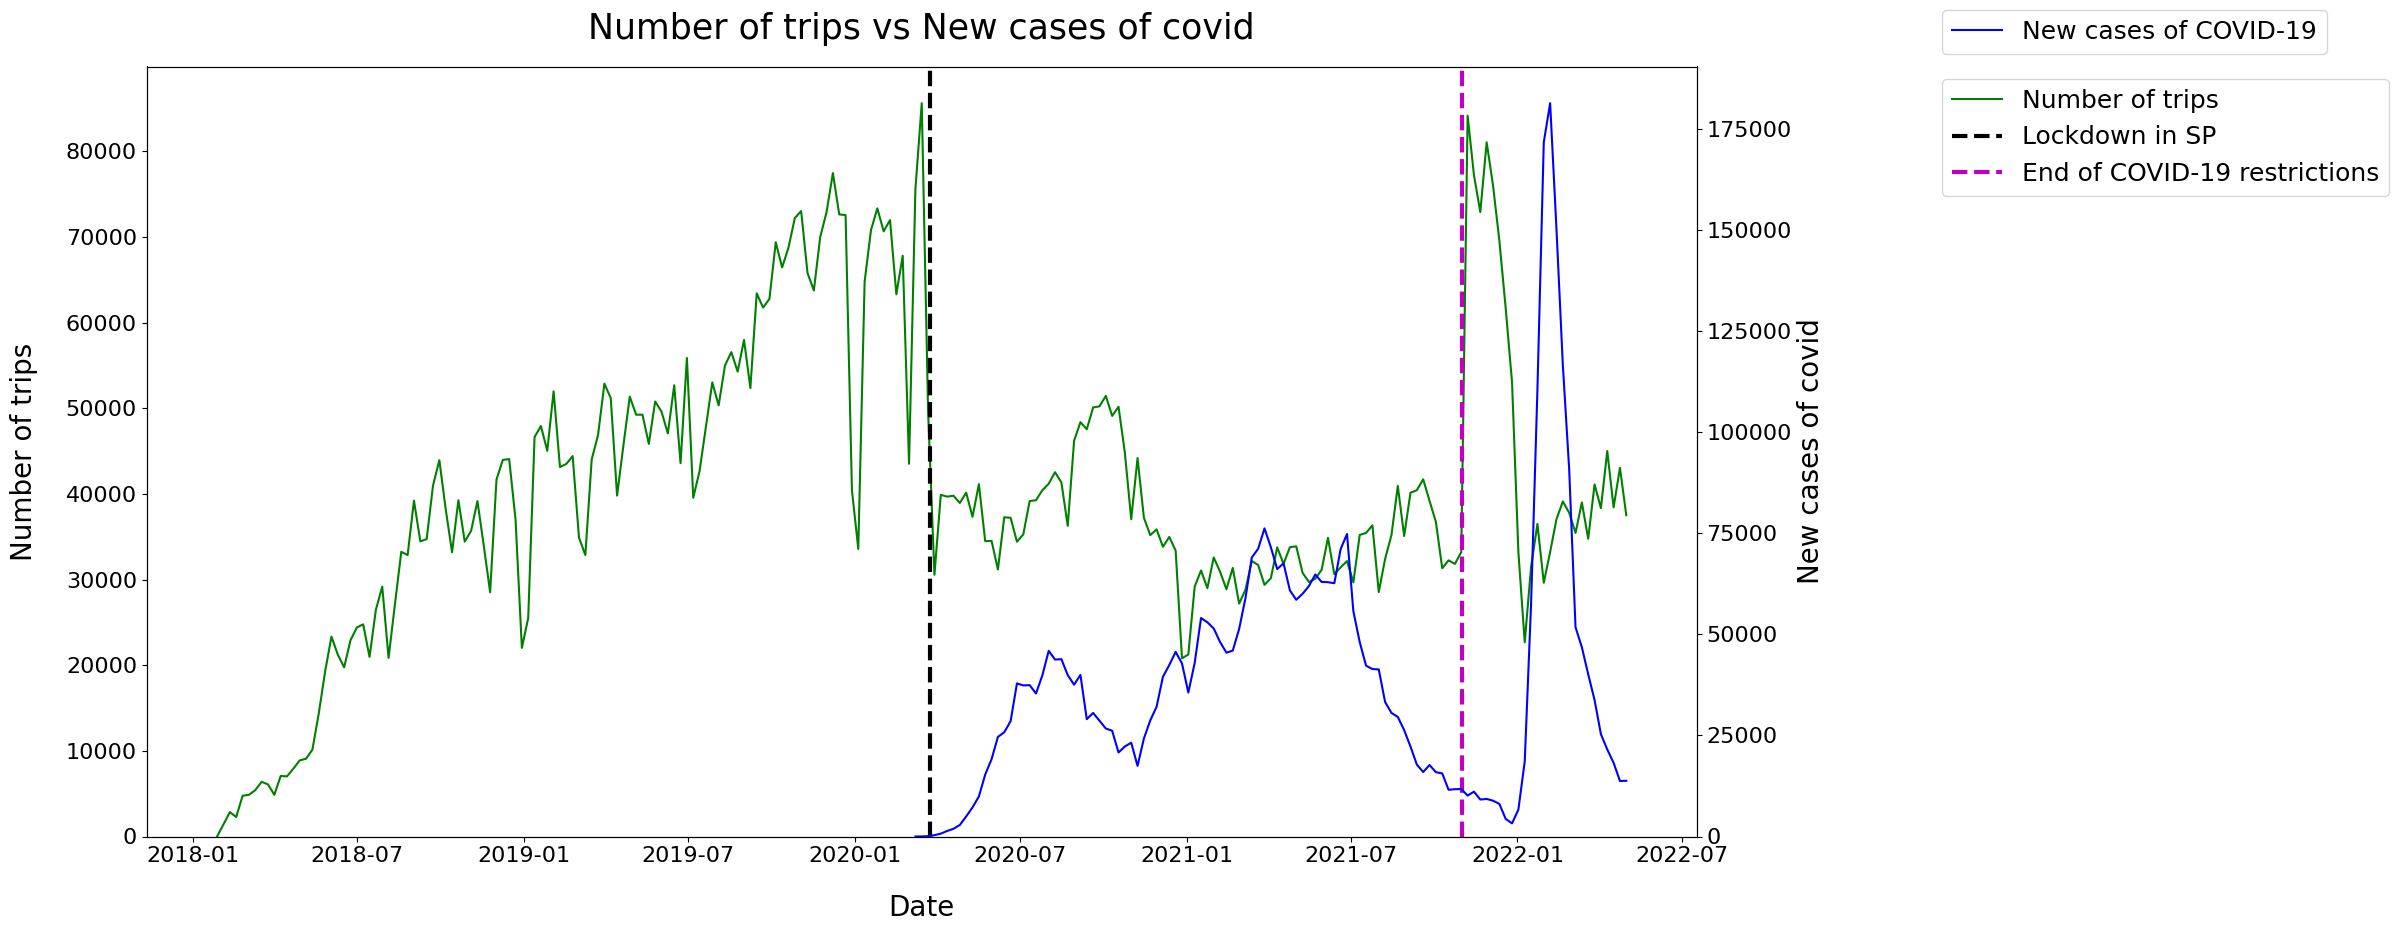

In [68]:
variable = 'number_of_trips'
covid_variable = 'new_cases_ma'
plot_variable_and_covid_together(variable, covid_variable)

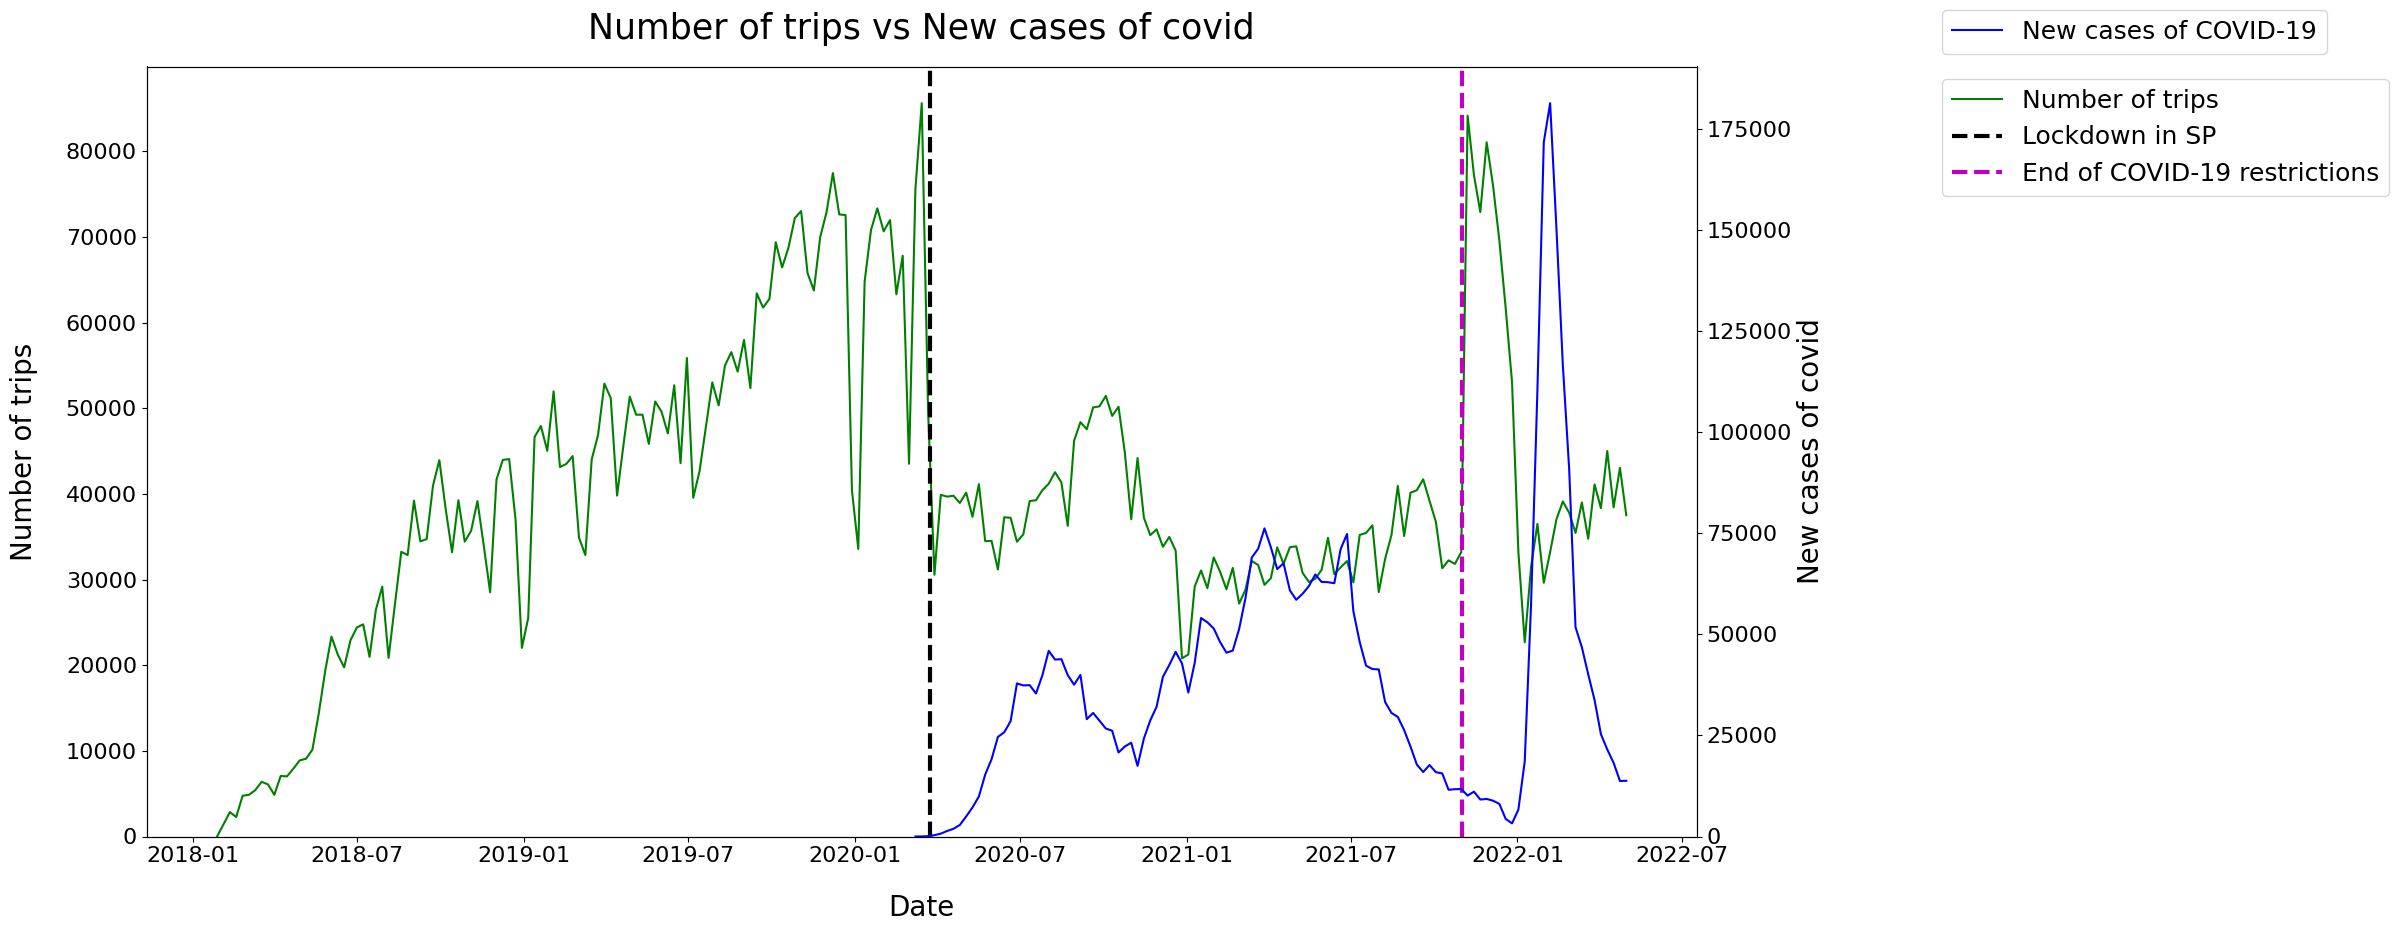

In [69]:
variable = 'number_of_trips'
covid_variable = 'new_cases_ma'
plot_variable_and_covid_together(variable, covid_variable)

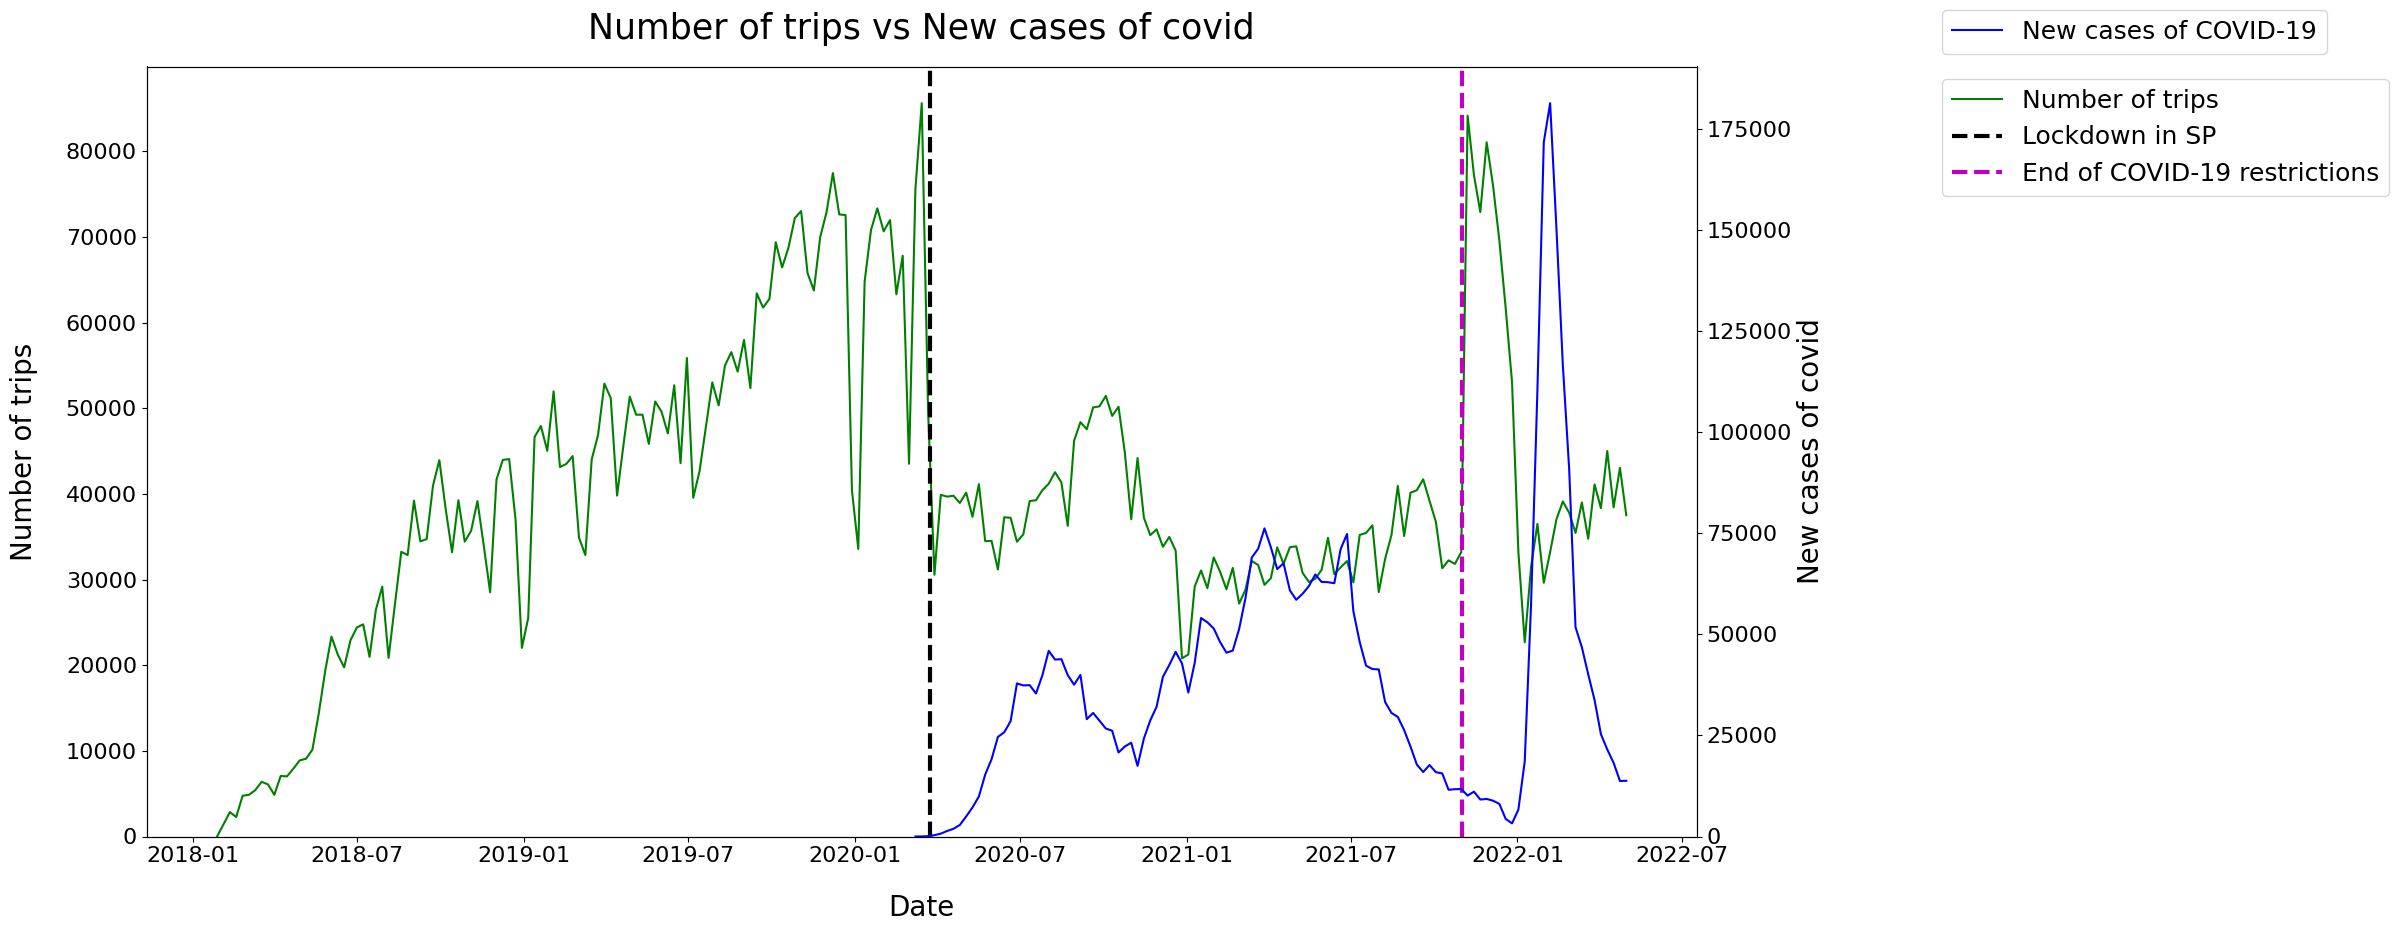

In [70]:
variable = 'number_of_trips'
covid_variable = 'new_cases_ma'
plot_variable_and_covid_together(variable, covid_variable)

In [71]:
import matplotlib.dates as mdates
def alt_bands(start, end, ax=None):
    ax = ax or plt.gca()
    x_left, x_right = ax.get_xlim()
    ax.axvspan(start, end, facecolor='red', alpha=0.1)
    ax.set_xlim(x_left, x_right)

def plot_variable(variable, period = 0, interval = 1):
    if period == -1:
        trips = trips_and_covid['2019':'2020-02']
    elif period == 1:
        trips = trips_and_covid['2020-3':]
    else:
        trips = trips_and_covid
    trips_and_covid_plot = trips.filter([variable, covid_variable])
    fig, ax = plt.subplots()
    fig.set_figwidth(20)
    fig.set_figheight(10)
    ax.plot(trips_and_covid_plot.index, trips_and_covid_plot[variable], 'g-')
    if period == 0:
        ax.axvline(pd.to_datetime('2020-03-24'), color="black", linestyle="--",  label='Início da quarentena')
    ax.set_ylim(0)
    ax.set_xlabel('Date', fontsize=20, labelpad = 10)
    ax.set_ylabel('Daily average of number of trips', fontsize=20, labelpad = 15)

    # set monthly locator
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=interval))
    # set formatter
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
    # set font and rotation for date tick labels
    plt.gcf().autofmt_xdate()

    if True:
        title = "Weekly variation of the average daily number of trips"
    else:    
        title = "'{variable}' vs '{covid_variable}'".format(variable = variable, covid_variable = covid_variable)
    plt.title(title, size=22, pad = 10)
    plt.ylim(bottom=0)
    plt.axis([None, None, 0, None])
    # Set tick font size
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontsize(16)
    if without_outliers:
        filename = variable +'_without_ouliers.png'
    else:
        filename = variable + '.png'
    # plt.savefig(destination_folder_path + 'versus_covid/'+filename)
    plt.show()

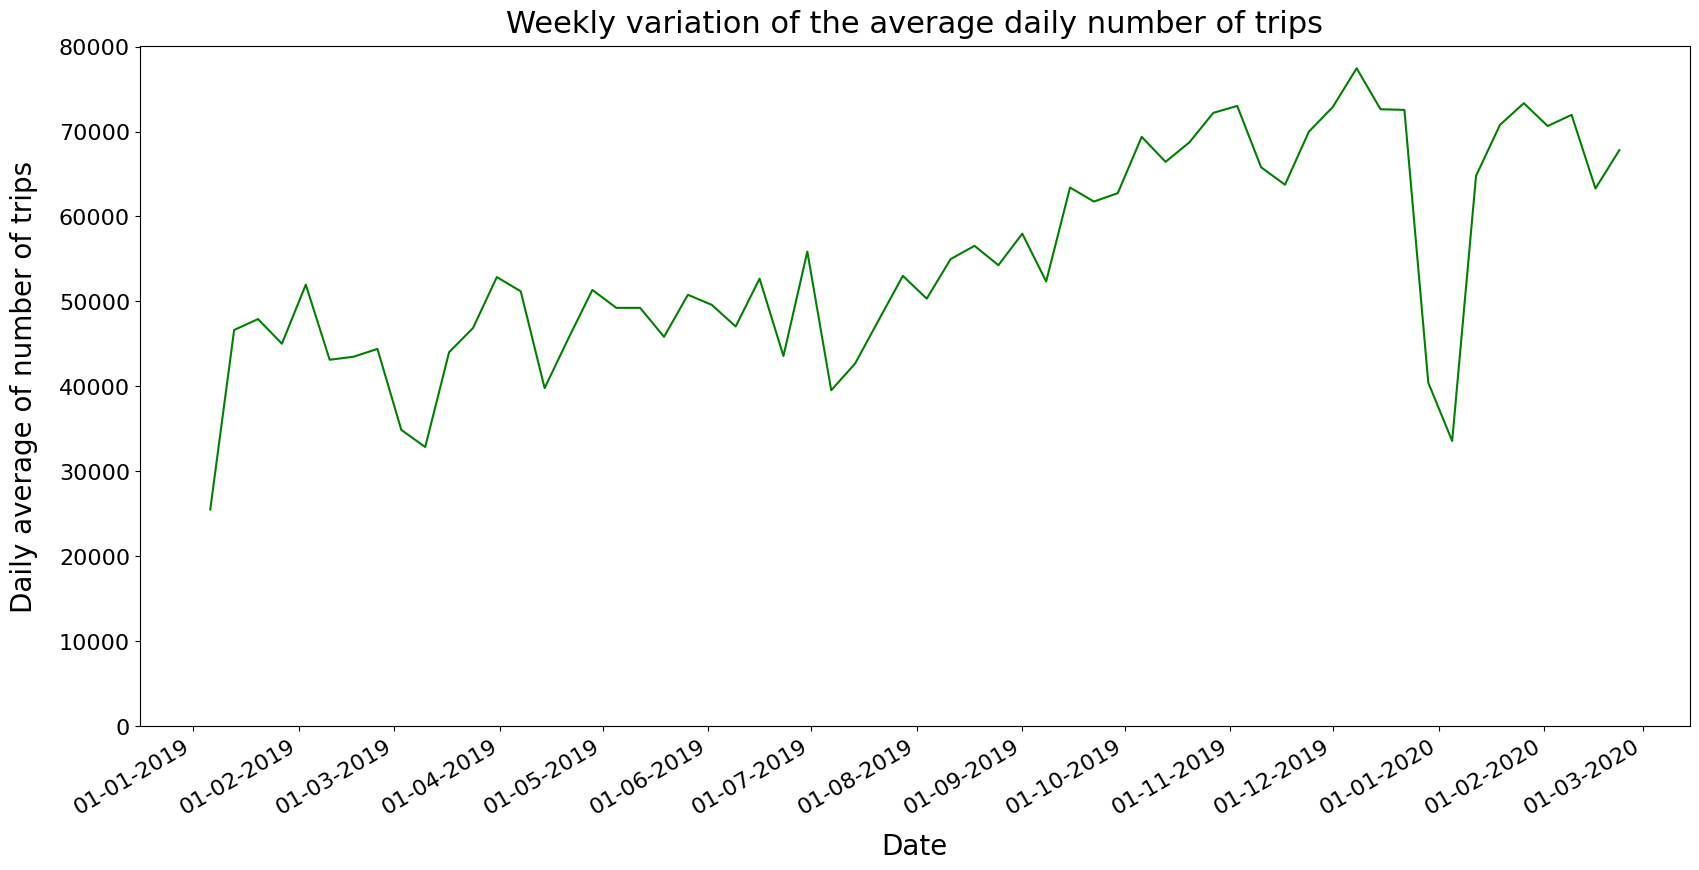

In [72]:
variable = 'number_of_trips'
covid_variable = 'new_cases_ma'
plot_variable(variable, -1)

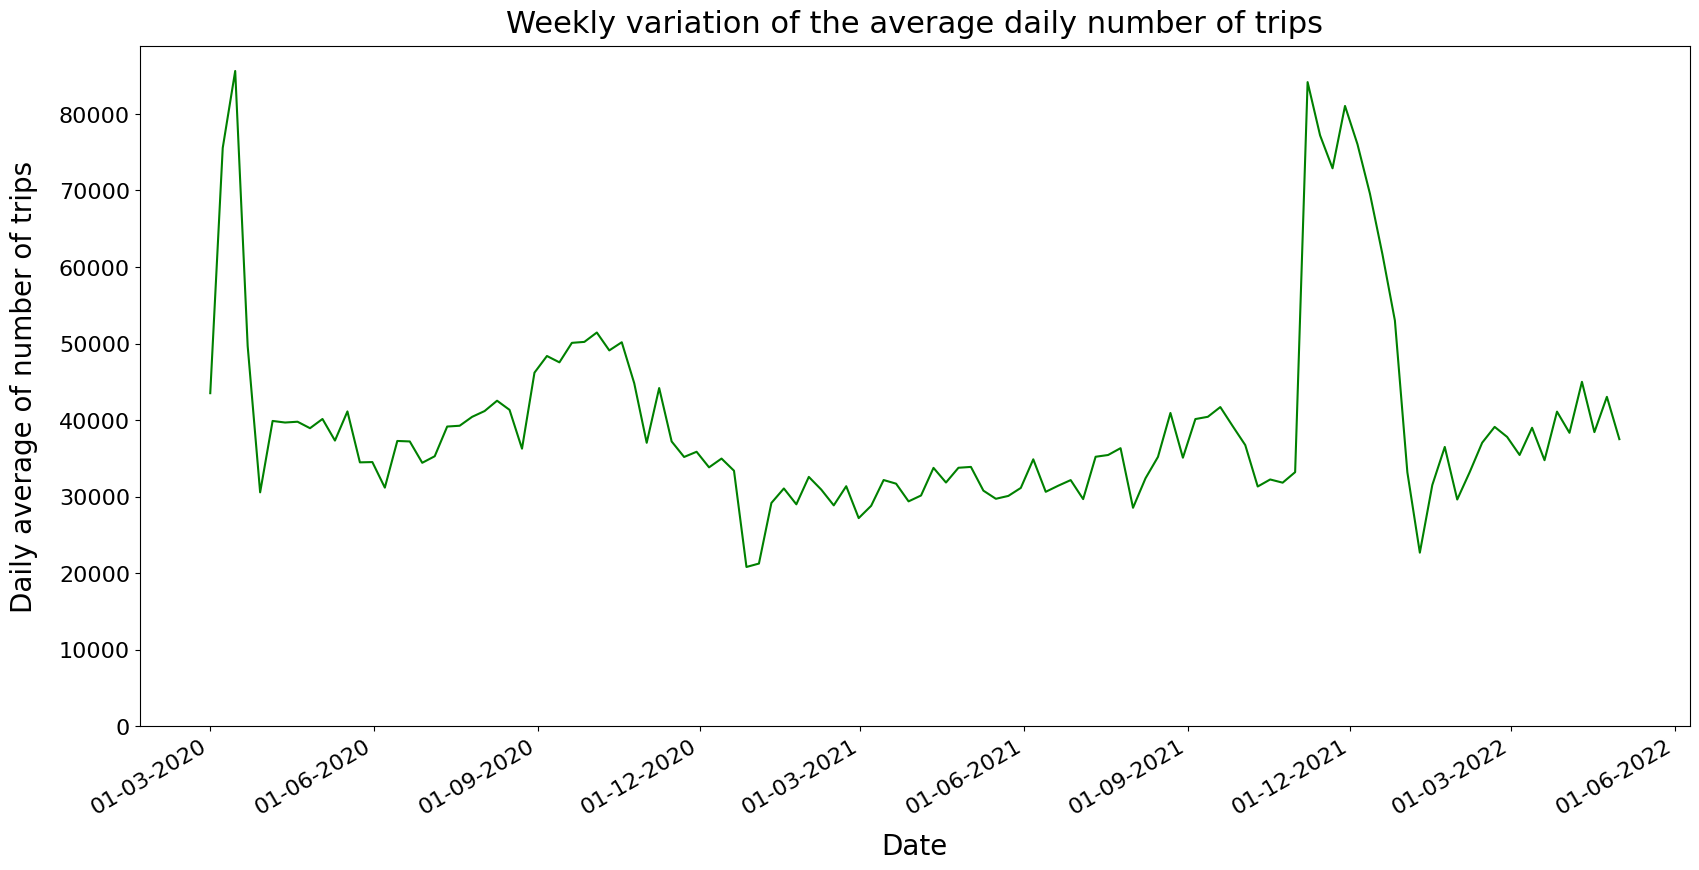

In [73]:
variable = 'number_of_trips'
plot_variable(variable, 1, 3)

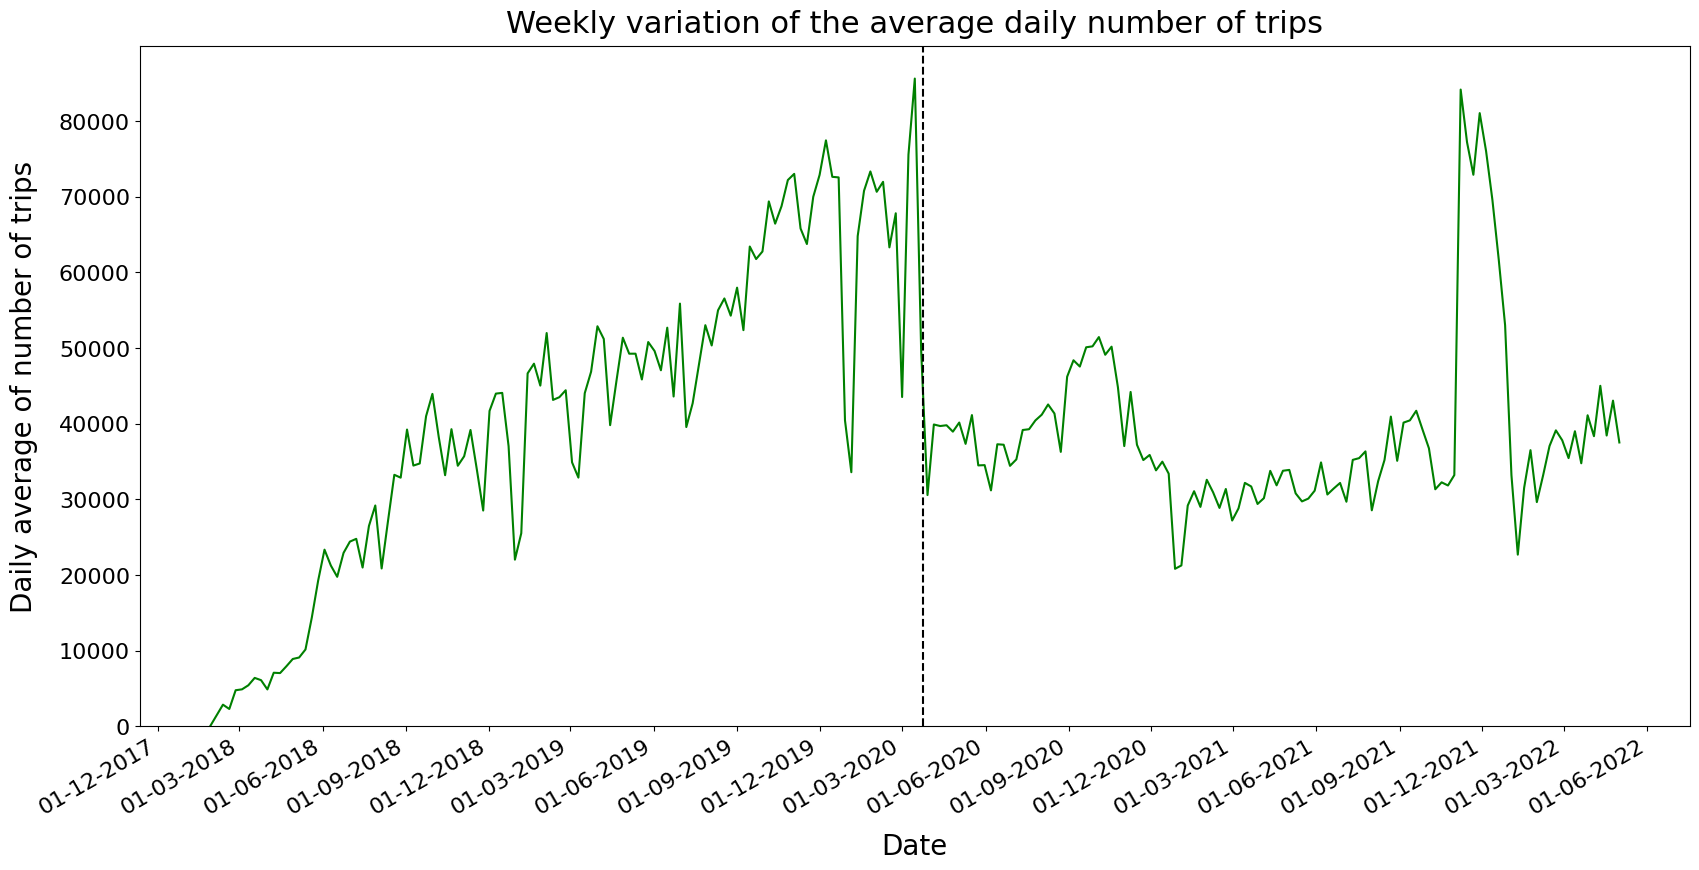

In [74]:
variable = 'number_of_trips'
covid_variable = 'new_cases_ma'
plot_variable(variable, 0,3)

<AxesSubplot:xlabel='date'>

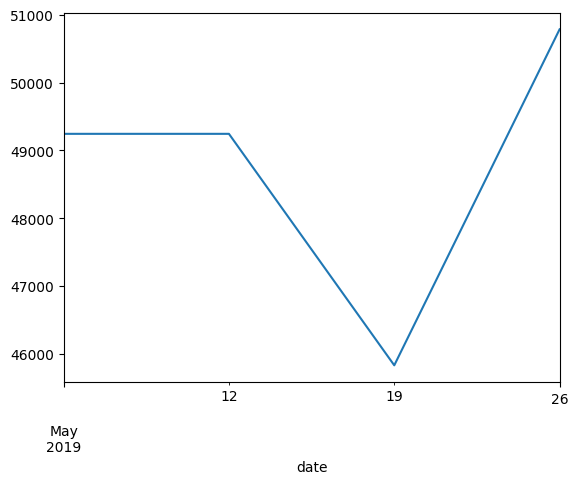

In [75]:
trips_and_covid['number_of_trips']['2019-05'].plot()

<AxesSubplot:xlabel='date'>

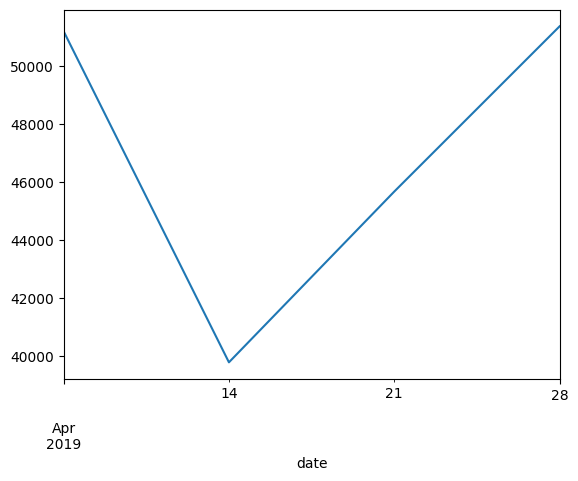

In [76]:
trips_and_covid['number_of_trips']['2019-04'].plot()

<AxesSubplot:xlabel='date'>

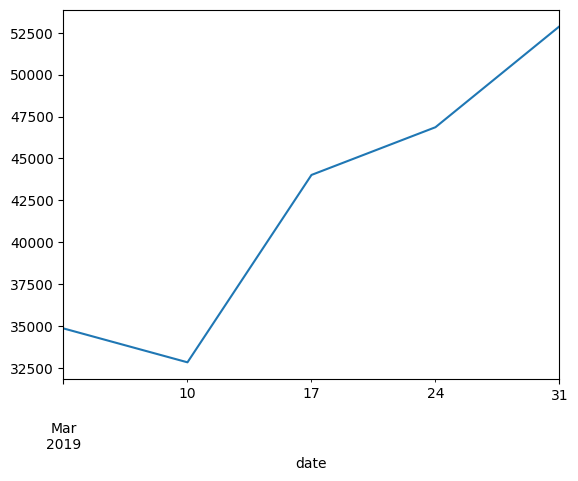

In [77]:
trips_and_covid['number_of_trips']['2019-03'].plot()

<AxesSubplot:xlabel='date'>

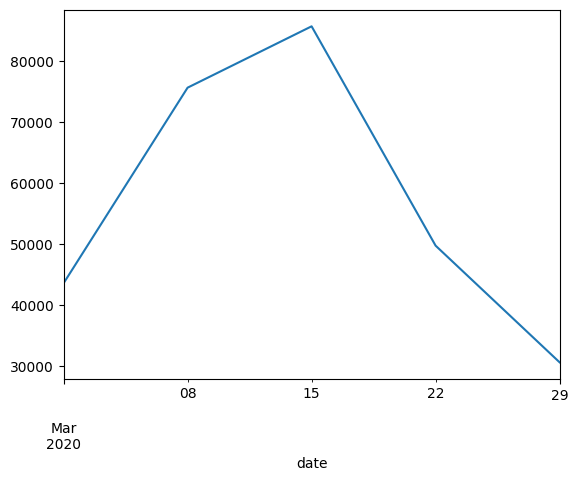

In [78]:
trips_and_covid['number_of_trips']['2020-03'].plot()

<AxesSubplot:xlabel='date'>

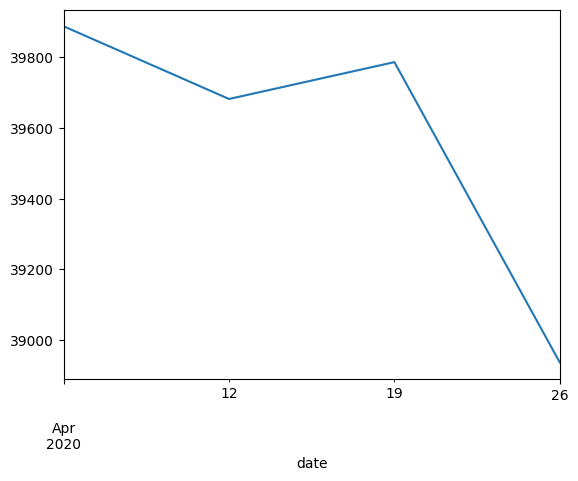

In [79]:
trips_and_covid['number_of_trips']['2020-04'].plot()

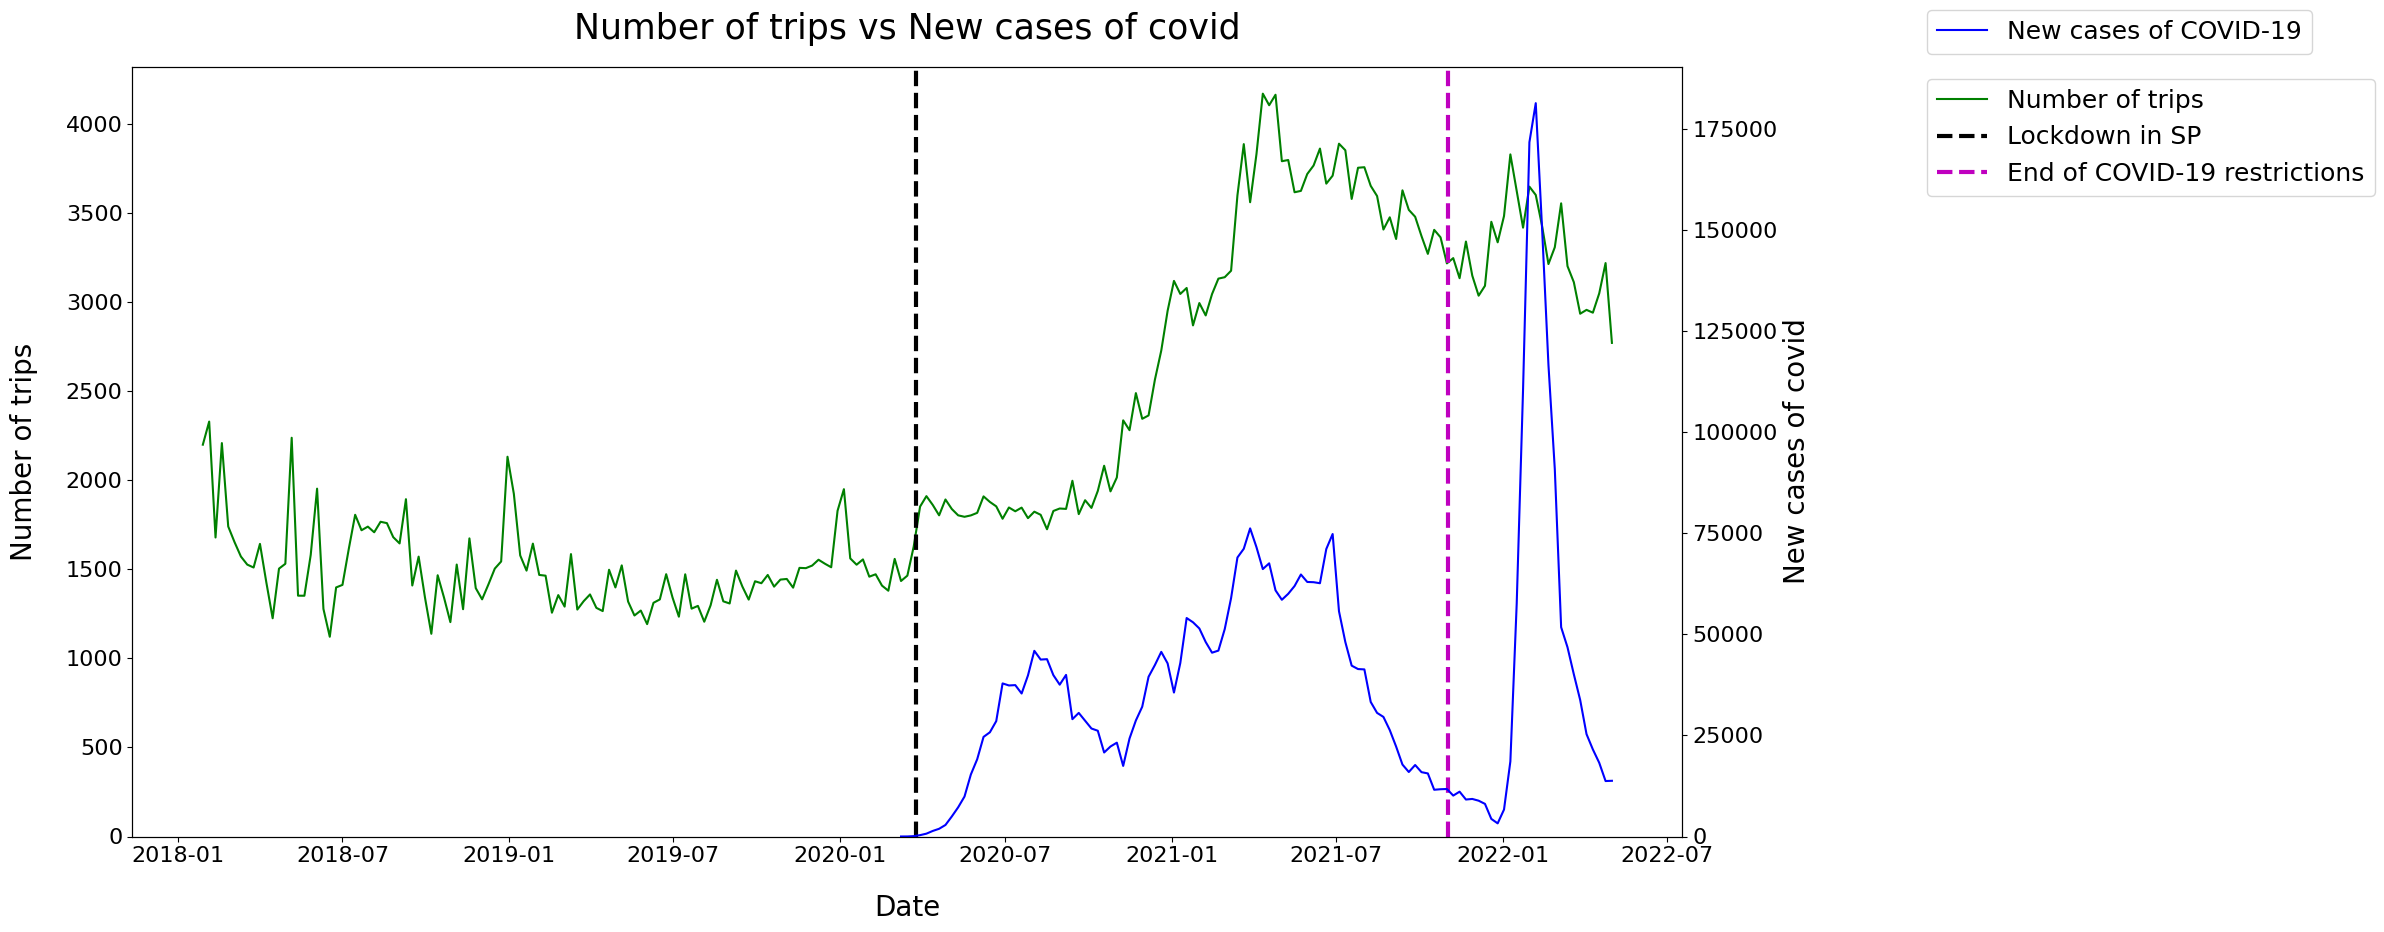

In [80]:
variable = 'tripduration'
covid_variable = 'new_cases_ma'
plot_variable_and_covid_together(variable, covid_variable)

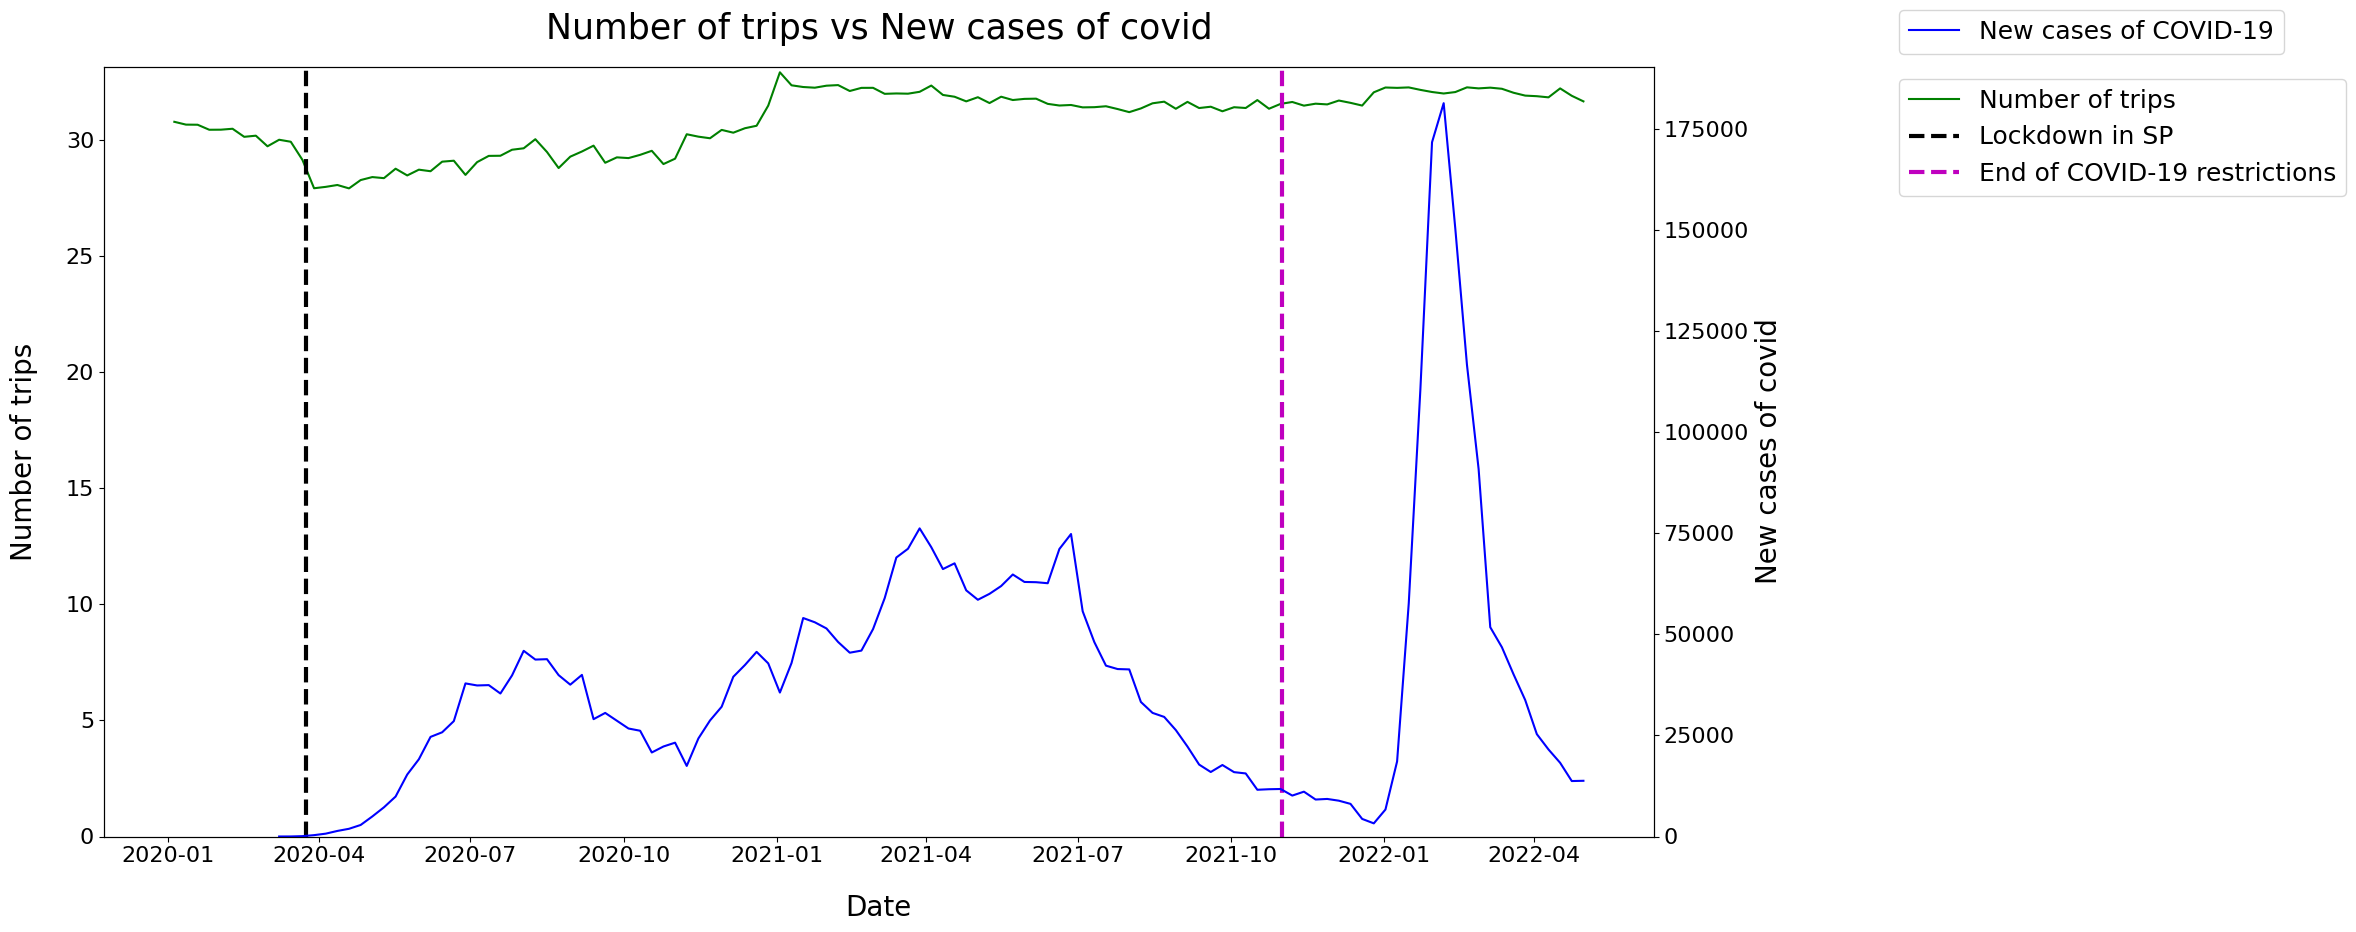

In [81]:
variable = 'age'
covid_variable = 'new_cases_ma'
plot_variable_and_covid_together(variable, covid_variable)

In [82]:
list('ass')

['a', 's', 's']

In [83]:
['ass']

['ass']

In [84]:
def plot_variable_and_covid_together(variable, covid_variables, save = False):
        if len(covid_variables) == 0:
            raise Exception("Array covid_variable cannot be empty")
        else:
            if not isinstance(covid_variables, list):
                covid_variables = [covid_variables]
            variables = [variable] + covid_variables
            print(variables)
            trips_and_covid_plot = trips_and_covid[:].filter(variables)
        
        fig, ax = plt.subplots()
        fig.set_figwidth(20)
        fig.set_figheight(10)

        ax2 = ax.twinx()
        ax.plot(trips_and_covid_plot.index, trips_and_covid_plot[variable], 'g-', label = variable)
        for covid_variable in covid_variables:
            if (covid_variable == 'new_deaths_ma'):
                ax2.plot(trips_and_covid_plot.index, trips_and_covid_plot[covid_variable] * 30, 'r-', label = covid_variable + ' * 30')
            else:
                ax2.plot(trips_and_covid_plot.index, trips_and_covid_plot[covid_variable], 'b-', label = covid_variable)
        ax2.set_ylim(0)
        ax.set_ylim(0)
        ax.set_xlabel('Date', fontsize=20, labelpad = 20)
        ax.set_ylabel(variable, color='k', fontsize=20, labelpad = 20)
        ax2.set_ylabel(covid_variable, color='k', fontsize=20, labelpad = 20)

        title = "'{variable}' vs '{covid_variable}'".format(variable = variable, covid_variable = covid_variable)
        plt.title(title, size=25, pad = 20)

        ax.axvline(pd.to_datetime('2020-03-24'), color="black", linestyle="--",  label='Lockdown in SP', linewidth = 3.0)
        ax.axvline(pd.to_datetime('2021-11-01'), color="m", linestyle="--",  label='End of COVID-19 restrictions', linewidth = 3.0)
        
        plt.ylim(bottom=0)
        plt.axis([None, None, 0, None])

        # Set tick font size
        for label in (ax.get_xticklabels() + ax.get_yticklabels()):
            label.set_fontsize(16)
        for label in (ax2.get_xticklabels() + ax2.get_yticklabels()):
            label.set_fontsize(16)
        
        ax.legend(bbox_to_anchor = (1.15, 1), loc = 'upper left', fontsize = 18)
        ax2.legend(bbox_to_anchor = (1.15, 1), loc = 'lower left', fontsize = 18)
        
        if save:
            filename = variable + '_vs_'+ covid_variable+'.png'
            plt.savefig(destination_folder_path + 'versus_covid/' + filename)
        
        plt.show()

['number_of_trips', 'new_cases_ma', 'new_deaths_ma']


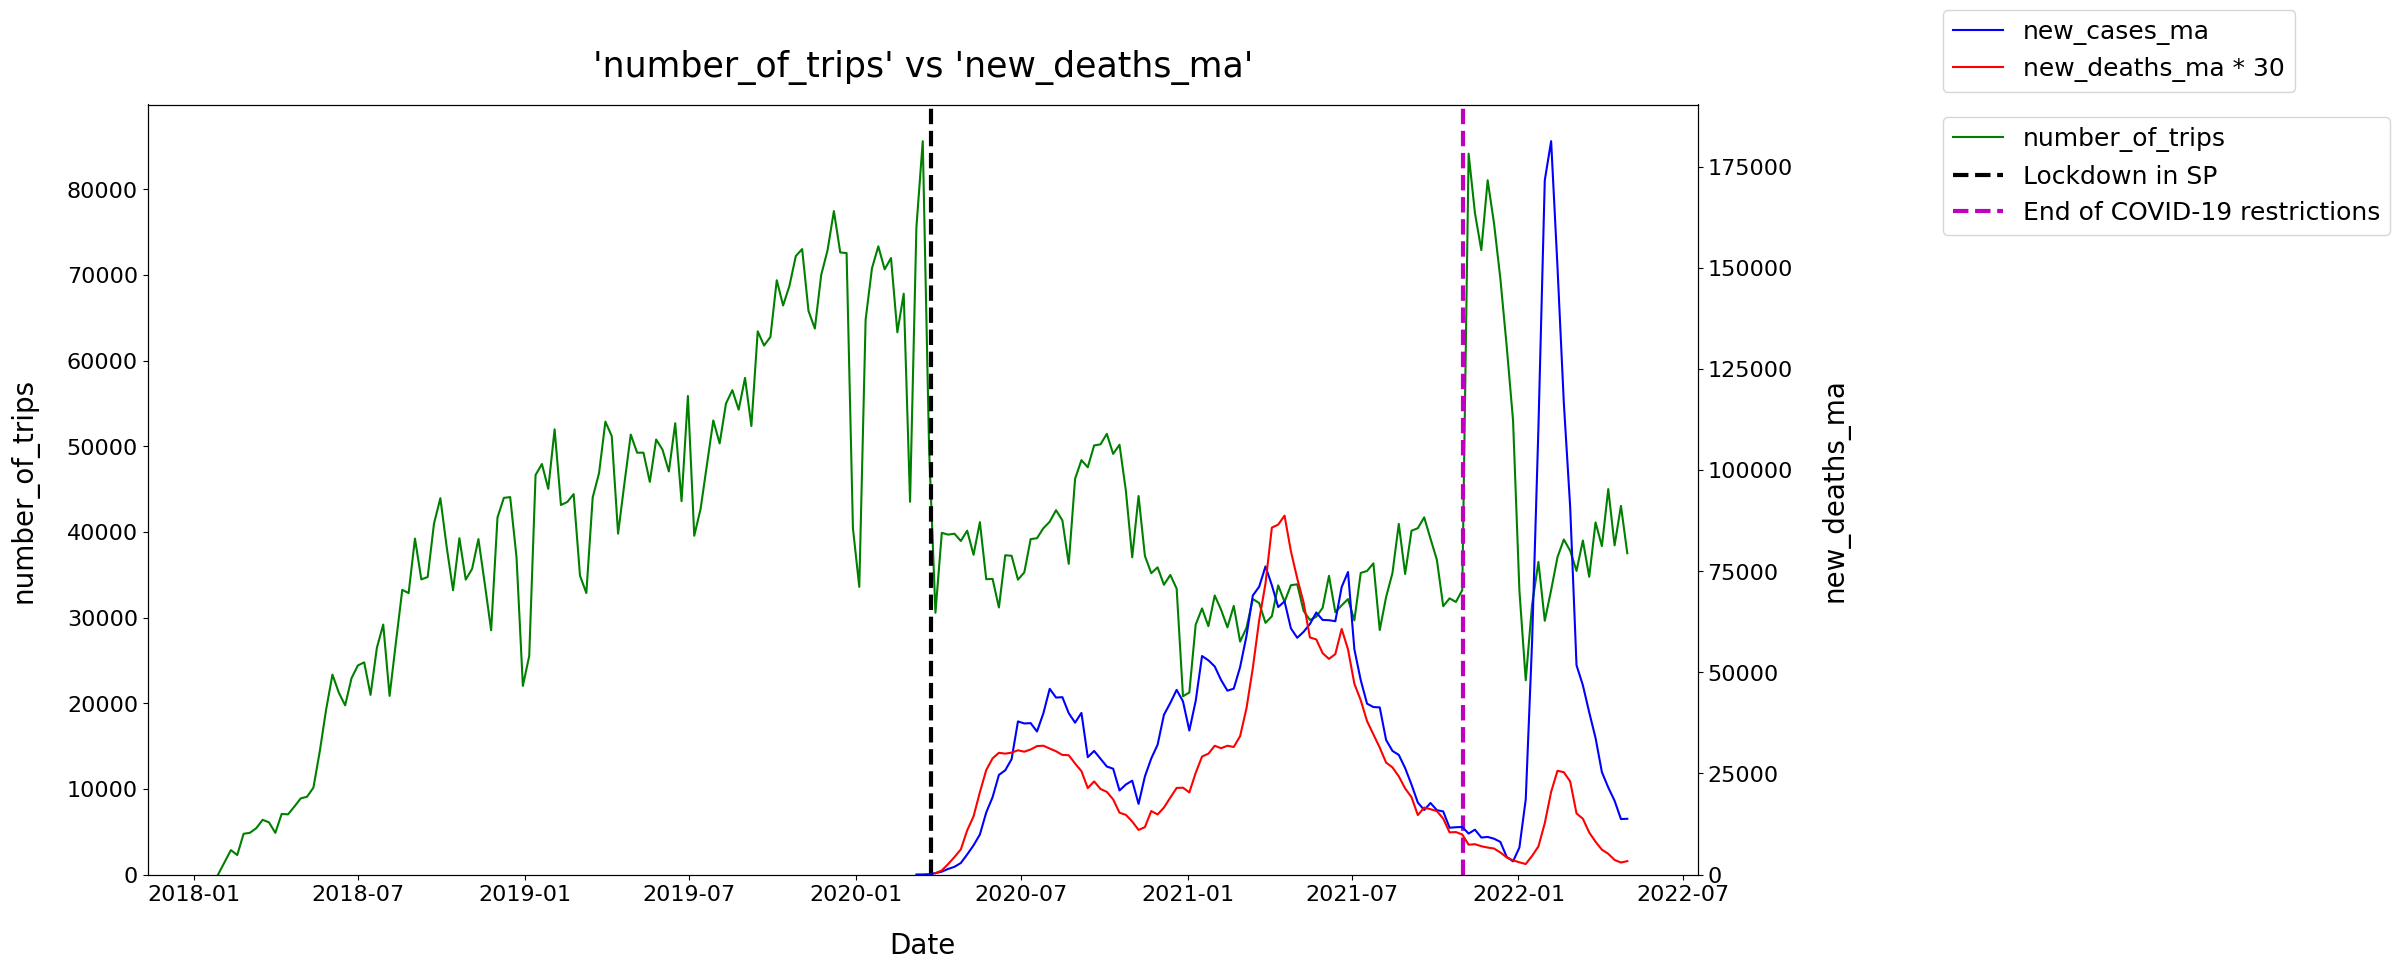

In [85]:
variable = 'number_of_trips'
covid_variable = ['new_cases_ma','new_deaths_ma']
plot_variable_and_covid_together(variable, covid_variable)

['tripduration', 'new_cases_ma', 'new_deaths_ma']


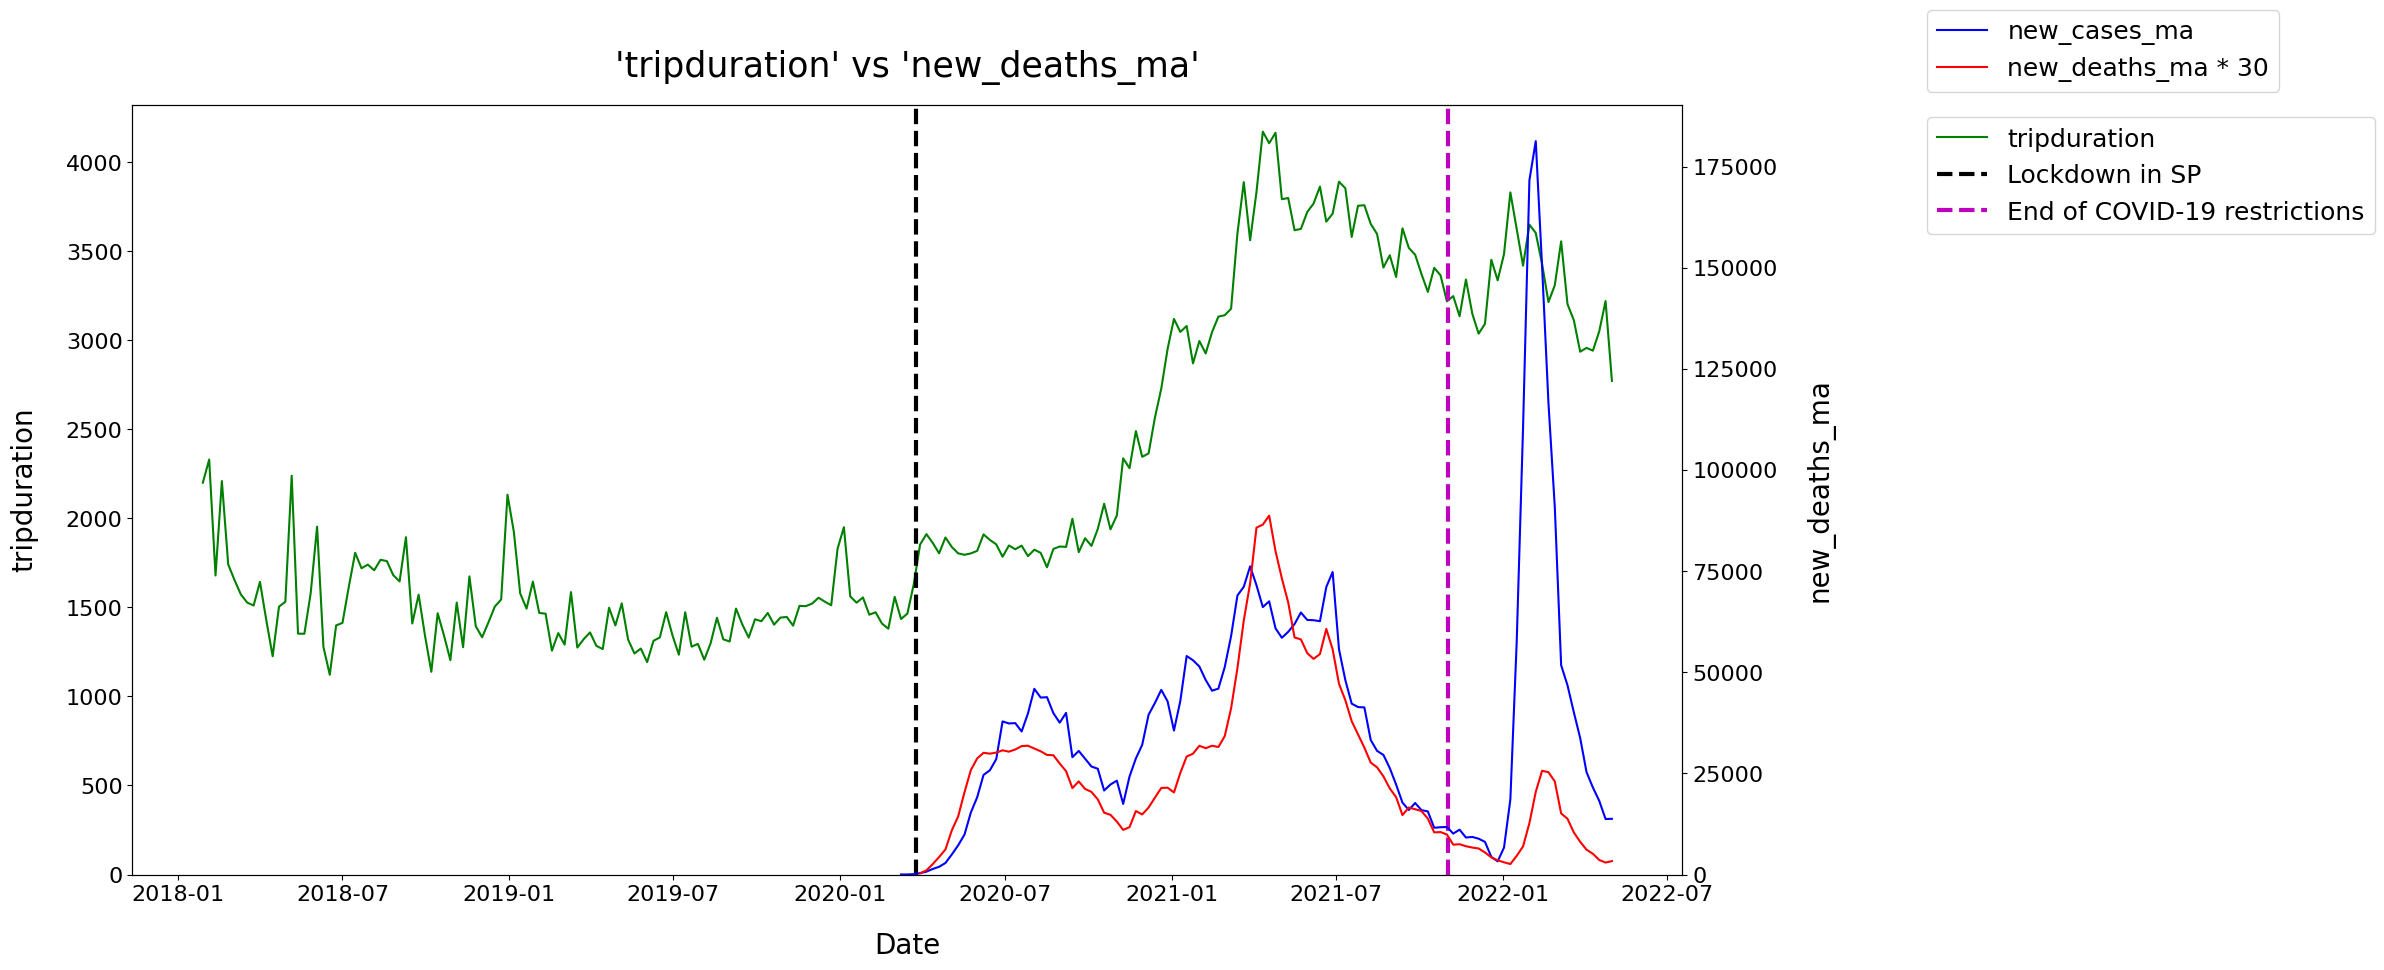

In [86]:
variable = 'tripduration'
covid_variable = ['new_cases_ma','new_deaths_ma']
plot_variable_and_covid_together(variable, covid_variable)

['tripduration', 'new_cases_ma']


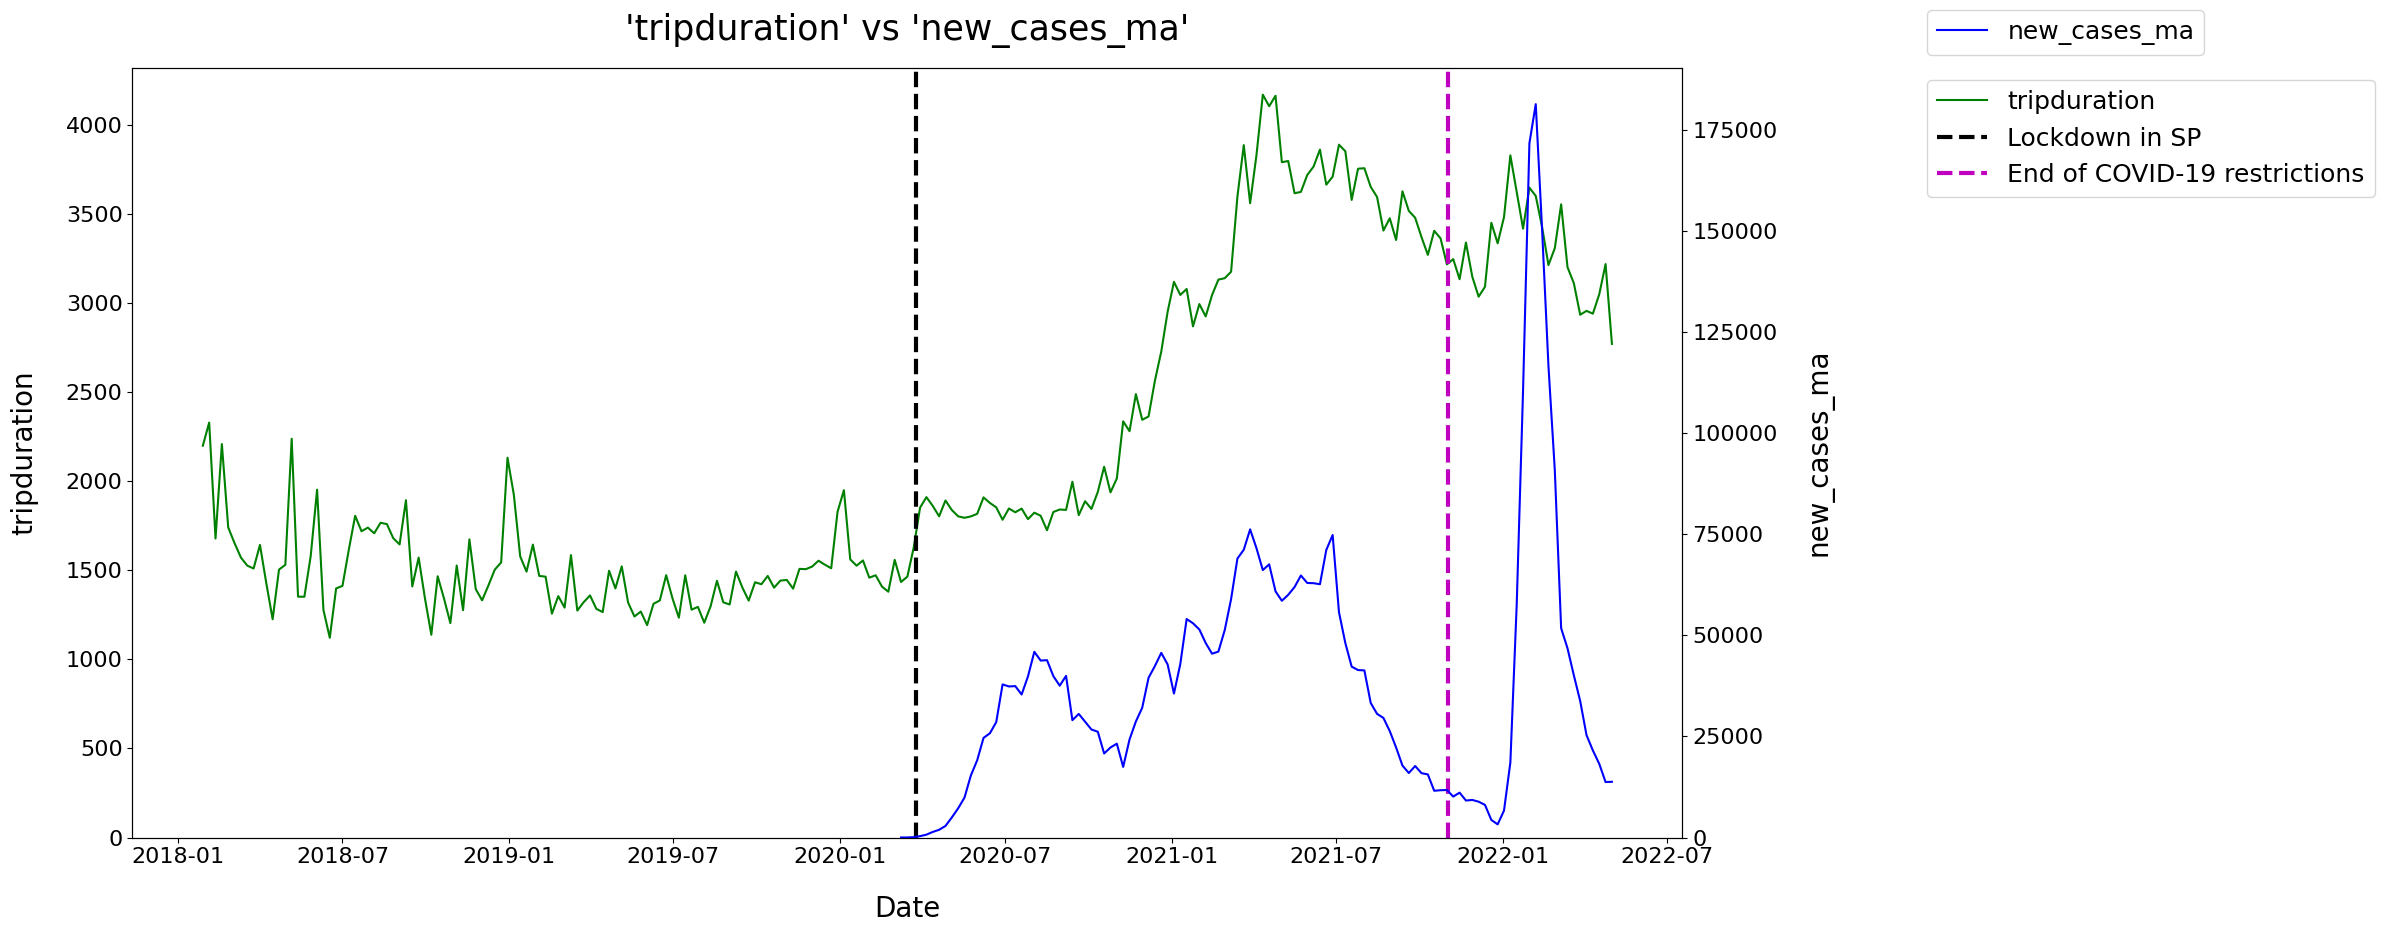

In [87]:
variable = 'tripduration'
covid_variable = 'new_cases_ma'
plot_variable_and_covid_together(variable, covid_variable)